In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

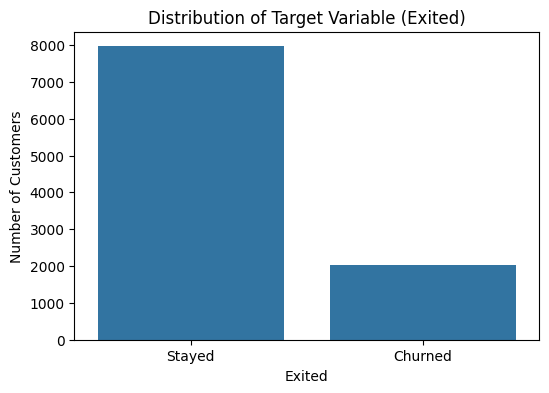

In [ ]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')

print(df.info())
print(df.describe())
print(df["Exited"].value_counts())

# Trực quan hóa
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Exited")
plt.title("Distribution of Target Variable (Exited)")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.ylabel("Number of Customers")
plt.xlabel("Exited")
plt.show()

# Drop unnecessary columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Encode categorical variables
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                      "HasCrCard", "IsActiveMember", "EstimatedSalary"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Define input features and target variable
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

After SMOTE - Class distribution:
 Exited
1    6370
0    6370
Name: count, dtype: int64


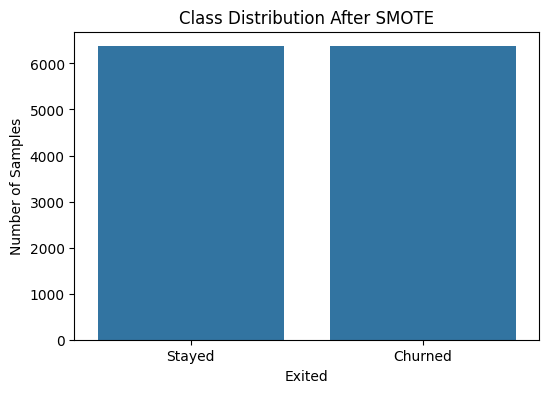

In [ ]:
# Áp dụng SMOTE sau khi chia dữ liệu để tránh data leakage
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra lại phân phối sau khi áp dụng SMOTE
print("After SMOTE - Class distribution:\n", pd.Series(y_resampled).value_counts())

# Trực quan hóa sau SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.ylabel("Number of Samples")
plt.xlabel("Exited")
plt.show()

Accuracy: 0.7260
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1593
           1       0.40      0.66      0.49       407

    accuracy                           0.73      2000
   macro avg       0.65      0.70      0.65      2000
weighted avg       0.79      0.73      0.75      2000



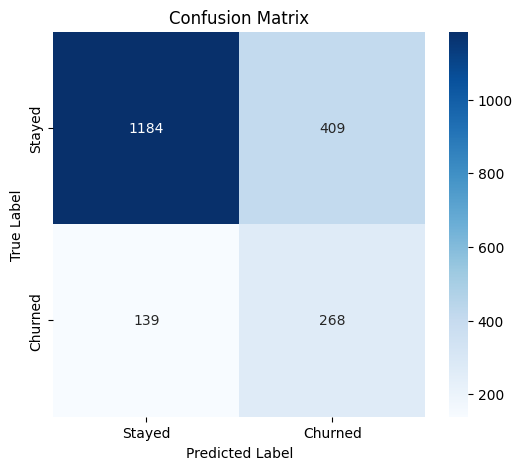

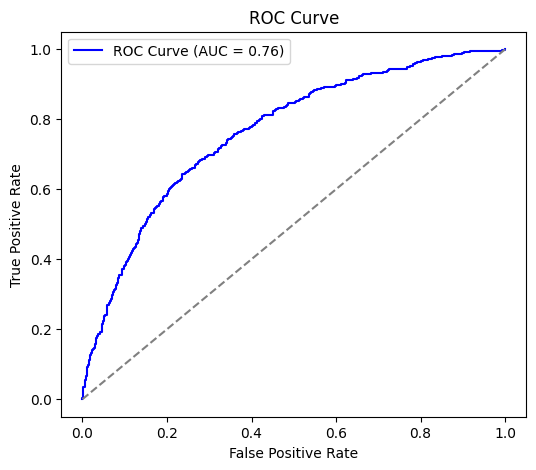

In [ ]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Accuracy: 0.7255
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1593
           1       0.39      0.65      0.49       407

    accuracy                           0.73      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.73      0.75      2000



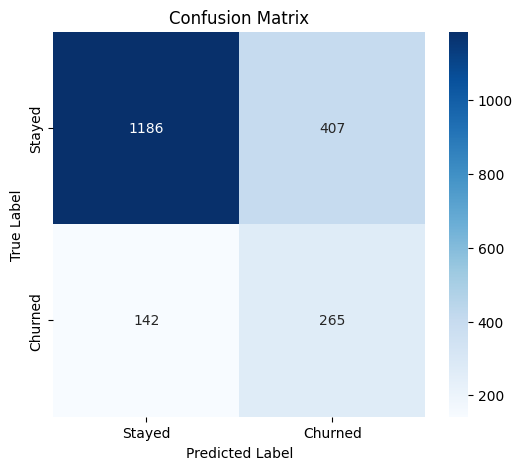

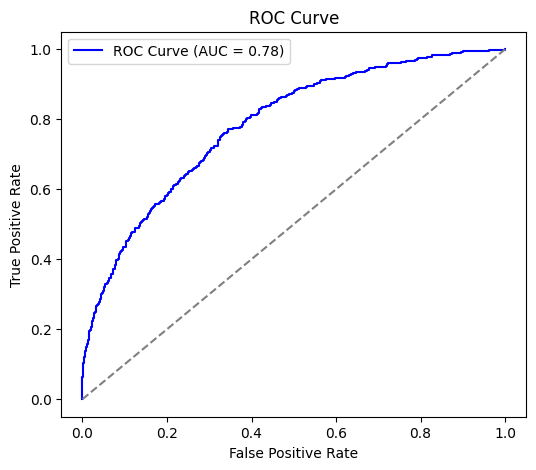

In [ ]:
# Train Naive Bayes model
model = GaussianNB()
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Accuracy: 0.8400
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



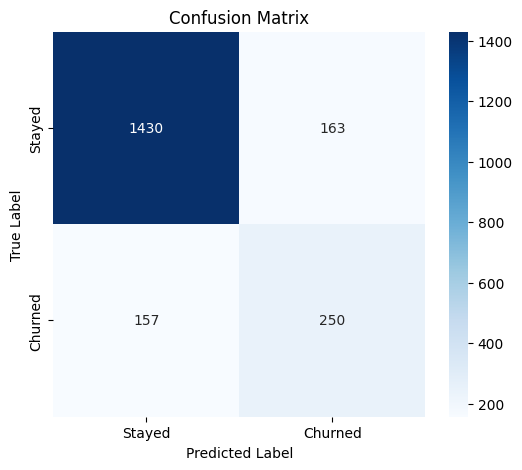

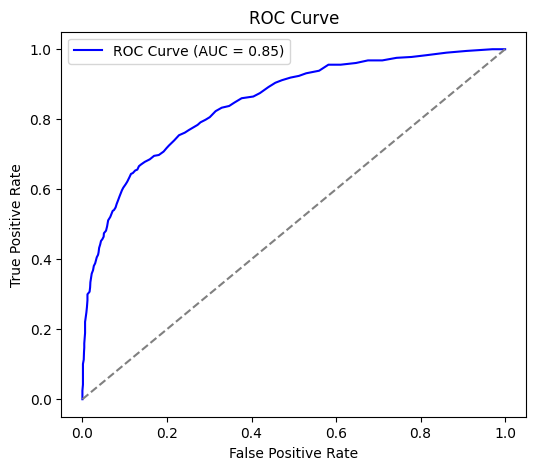

In [ ]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8425
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.61      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



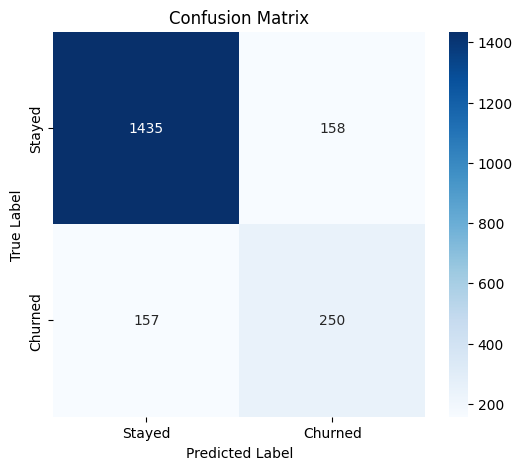

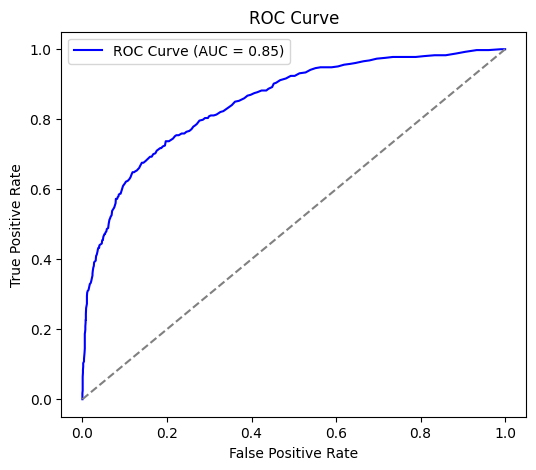

In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Use the best model from grid search
model = grid_search.best_estimator_

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Accuracy: 0.8430
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1593
           1       0.63      0.56      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



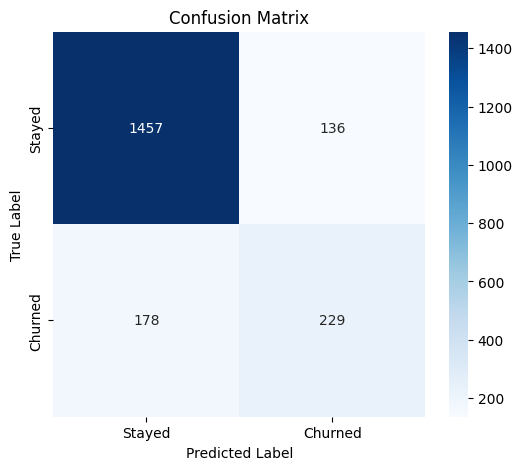

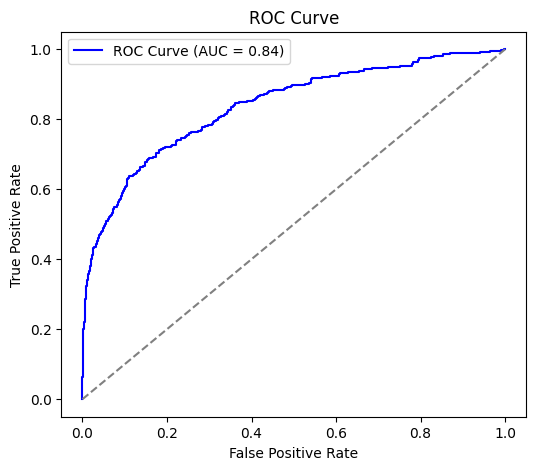

In [ ]:
# Train XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.8450
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.55      0.59       407

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.75      2000
weighted avg       0.84      0.84      0.84      2000



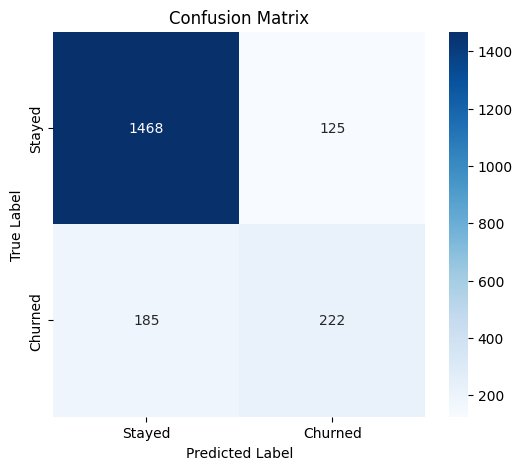

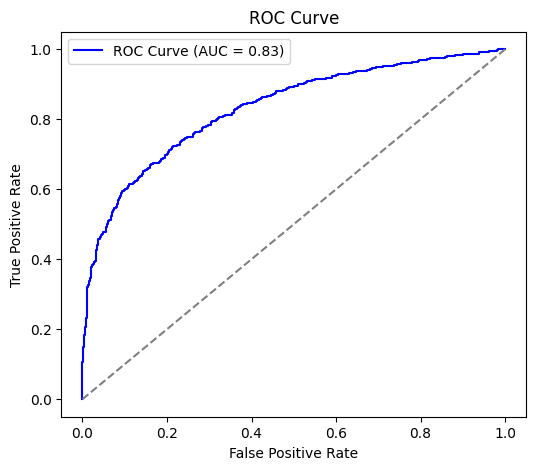

In [ ]:
# Define the XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on resampled training data
random_search.fit(X_resampled, y_resampled)

# Best estimator from random search
print("Best parameters found:", random_search.best_params_)
model = random_search.best_estimator_

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8235
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.75      2000
weighted avg       0.84      0.82      0.83      2000



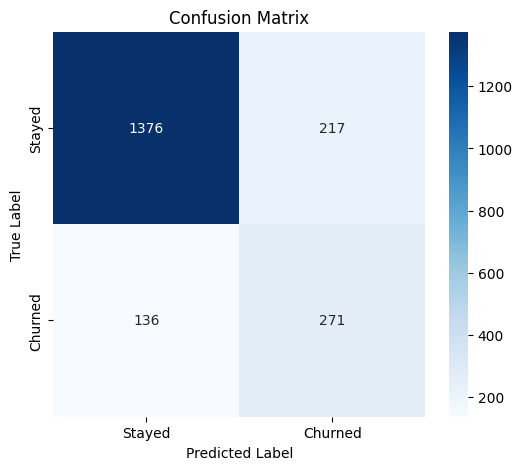

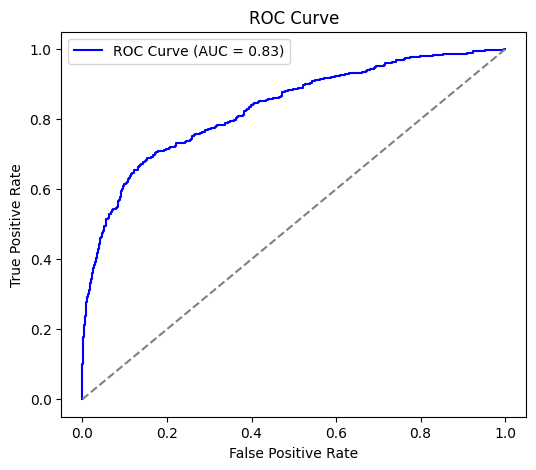

In [ ]:
# Train Neural Network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Accuracy: 0.8490
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.64      0.59      0.61       407

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



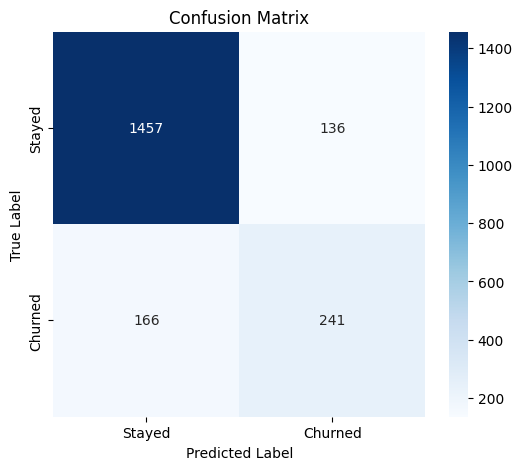

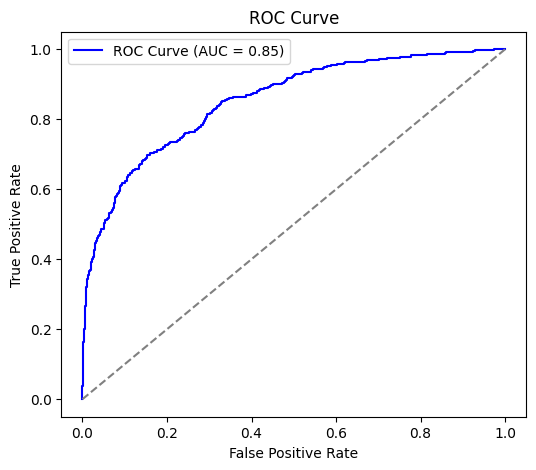

In [ ]:
# Define base learners and final estimator
base_learners = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
final_estimator = LogisticRegression()

# Create StackingClassifier
model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    passthrough=False,
    cv=5,
    n_jobs=-1
)

# Train Stacking model
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
!ngrok authtoken 2y9qcDGTD9I2w7n7eOzSAhqtWQe_D3AqBGUGUhfKBwnV1u3E

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import streamlit as st
from pyngrok import ngrok

# Mở cổng 8501 (mặc định của Streamlit)
public_url = ngrok.connect(8501)
print(f"Ngrok tunnel URL: {public_url}")

# Chạy Streamlit app (ở background)
!streamlit run churn_app.py &

Ngrok tunnel URL: NgrokTunnel: "https://c3d0-35-245-197-251.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.197.251:8501

Iteration 1, loss = 0.61042761
Iteration 2, loss = 0.53063582
Iteration 3, loss = 0.49785547
Iteration 4, loss = 0.47180048
Iteration 5, loss = 0.45285812
Iteration 6, loss = 0.44035034
Iteration 7, loss = 0.43201425
Iteration 8, loss = 0.42683699
Iteration 9, loss = 0.42330612
Iteration 10, loss = 0.42081336
Iteration 11, loss = 0.41874108
Iteration 12, loss = 0.41678505
Iteration 13, loss = 0.41515961
Iteration 14, loss = 0.41320693
Iteration 15, loss = 0.41296325
Iteration 16, loss = 0.41108596
Iteration 17, loss = 0.41030314
Iteration 18, loss = 0.40882726
Iteration 19, loss = 0.40750231
Iteration 20, loss = 0.40630034
Iteration 21, loss = 0.40547310
Iteration 22, loss = 0.40422865
Iteration 23, loss = 0.40

  Stopping...
